## **1. Importing dataset and pandas**



In [1]:
!git clone https://github.com/AshishJangra27/GeeksforGeeks-Articles-Data-Analysis
import pandas as pd
df = pd.read_csv('/content/GeeksforGeeks-Articles-Data-Analysis/articles.csv')
df.head()


fatal: destination path 'GeeksforGeeks-Articles-Data-Analysis' already exists and is not an empty directory.


,title,author_id,last_updated,link,category
0,5 Best Practices For Writing SQL Joins,priyankab14,"21 Feb, 2022",https://www.geeksforgeeks.org/5-best-practices...,easy
1,Foundation CSS Dropdown Menu,ishankhandelwals,"20 Feb, 2022",https://www.geeksforgeeks.org/foundation-css-d...,easy
2,Top 20 Excel Shortcuts That You Need To Know,priyankab14,"17 Feb, 2022",https://www.geeksforgeeks.org/top-20-excel-sho...,easy
3,Servlet – Fetching Result,nishatiwari1719,"17 Feb, 2022",https://www.geeksforgeeks.org/servlet-fetching...,easy
4,Suffix Sum Array,rohit768,"21 Feb, 2022",https://www.geeksforgeeks.org/suffix-sum-array/,easy


## **2. Exploring Dataset**

**2.1 : Checking if there are any null values**

In [21]:
df.isnull().sum()

title           0
author_id       0
last_updated    0
link            0
category        0
date            0
month           0
year            0
day             0
dtype: int64

**2.2 : Dropping any null or duplicate values**

In [22]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.isnull().sum()

title           0
author_id       0
last_updated    0
link            0
category        0
date            0
month           0
year            0
day             0
dtype: int64

**2.3 : Exploring 'category' column**

In [23]:
#Method 1

set(df['category'])

{'basic', 'easy', 'expert', 'hard', 'medium'}

In [24]:
#Method 2

df['category'].unique()

array(['easy', 'basic', 'medium', 'hard', 'expert'], dtype=object)

**2.4 : Exploring 'link' column**

In [27]:
df['link'].nunique()

34437

**2.5 : Exploring 'last_updated' column**

> We want to print only the first 5 rows to check the format

In [28]:
#Method-1

lst = []
for i in df['last_updated']:
  lst.append(i)

lst[:5]

['21 Feb, 2022',
 '20 Feb, 2022',
 '17 Feb, 2022',
 '17 Feb, 2022',
 '21 Feb, 2022']

In [29]:
#Method-2

df['last_updated'].head()

0    21 Feb, 2022
1    20 Feb, 2022
2    17 Feb, 2022
3    17 Feb, 2022
4    21 Feb, 2022
Name: last_updated, dtype: object

In [30]:
df['last_updated'].value_counts()

28 Jun, 2021    1283
24 Nov, 2021     155
21 May, 2021     151
30 Jun, 2021     151
11 Aug, 2021     140
                ... 
06 Jan, 2017       1
07 Jun, 2016       1
10 Jul, 2016       1
04 May, 2017       1
12 May, 2015       1
Name: last_updated, Length: 1958, dtype: int64

**2.6 : Exploring 'author_id' column**

In [31]:
df['author_id'].value_counts()

GeeksforGeeks        11924
ManasChhabra2          316
Striver                261
manjeet_04             246
Chinmoy Lenka          191
                     ...  
cybercreed010            1
KritikaSharma21          1
RatulSarkar1             1
webwithsantanu           1
sandeep tadepalli        1
Name: author_id, Length: 5583, dtype: int64

## **3. Data Cleaning**

**3.1 : Cleaning Dates**

In [13]:
df.head()

,title,author_id,last_updated,link,category
0,5 Best Practices For Writing SQL Joins,priyankab14,"21 Feb, 2022",https://www.geeksforgeeks.org/5-best-practices...,easy
1,Foundation CSS Dropdown Menu,ishankhandelwals,"20 Feb, 2022",https://www.geeksforgeeks.org/foundation-css-d...,easy
2,Top 20 Excel Shortcuts That You Need To Know,priyankab14,"17 Feb, 2022",https://www.geeksforgeeks.org/top-20-excel-sho...,easy
3,Servlet – Fetching Result,nishatiwari1719,"17 Feb, 2022",https://www.geeksforgeeks.org/servlet-fetching...,easy
4,Suffix Sum Array,rohit768,"21 Feb, 2022",https://www.geeksforgeeks.org/suffix-sum-array/,easy


**3.1.1: Some Dates contain Easy Basic Medium Hard, which need to be remove from the database**

In [14]:
# len(df[df['last_updated'] == 'Easy'])
# len(df[df['last_updated'] == 'Basic'])
# len(df[df['last_updated'] == 'Medium'])
# len(df[df['last_updated'] == 'Hard'])
# len(df[df['last_updated'] == 'Expert'])


df = df[df['last_updated'] != 'Easy']
print(len(df))
df = df[df['last_updated'] != 'Basic']
print(len(df))
df = df[df['last_updated'] != 'Medium']
print(len(df))
df = df[df['last_updated'] != 'Hard']
print(len(df))

34497
34495
34455
34438


**3.1.2 : Split dates based on day month year**

In [15]:
date = []
month = []
year = []

for i in df['last_updated']:
  i = i.replace(',','')
  date.append(i.split(' ')[0])
  month.append(i.split(' ')[1])
  year.append(i.split(' ')[2])

df['date'] = date
df['month'] = month
df['year'] = year


df.head()

,title,author_id,last_updated,link,category,date,month,year
0,5 Best Practices For Writing SQL Joins,priyankab14,"21 Feb, 2022",https://www.geeksforgeeks.org/5-best-practices...,easy,21,Feb,2022
1,Foundation CSS Dropdown Menu,ishankhandelwals,"20 Feb, 2022",https://www.geeksforgeeks.org/foundation-css-d...,easy,20,Feb,2022
2,Top 20 Excel Shortcuts That You Need To Know,priyankab14,"17 Feb, 2022",https://www.geeksforgeeks.org/top-20-excel-sho...,easy,17,Feb,2022
3,Servlet – Fetching Result,nishatiwari1719,"17 Feb, 2022",https://www.geeksforgeeks.org/servlet-fetching...,easy,17,Feb,2022
4,Suffix Sum Array,rohit768,"21 Feb, 2022",https://www.geeksforgeeks.org/suffix-sum-array/,easy,21,Feb,2022


**3.1.3 : Finding days for each of the Date using datetime module**

In [16]:
import datetime

def find_day(d):
  d_obj = datetime.datetime.strptime(d, '%d %b %Y')
  day = d_obj.strftime('%A')
  return day

df['day'] = [find_day(d.replace(',','')) for d in df['last_updated']]
df['day'] = [find_day(date.replace(',','')) for date in df['last_updated']]
df.head()

,title,author_id,last_updated,link,category,date,month,year,day
0,5 Best Practices For Writing SQL Joins,priyankab14,"21 Feb, 2022",https://www.geeksforgeeks.org/5-best-practices...,easy,21,Feb,2022,Monday
1,Foundation CSS Dropdown Menu,ishankhandelwals,"20 Feb, 2022",https://www.geeksforgeeks.org/foundation-css-d...,easy,20,Feb,2022,Sunday
2,Top 20 Excel Shortcuts That You Need To Know,priyankab14,"17 Feb, 2022",https://www.geeksforgeeks.org/top-20-excel-sho...,easy,17,Feb,2022,Thursday
3,Servlet – Fetching Result,nishatiwari1719,"17 Feb, 2022",https://www.geeksforgeeks.org/servlet-fetching...,easy,17,Feb,2022,Thursday
4,Suffix Sum Array,rohit768,"21 Feb, 2022",https://www.geeksforgeeks.org/suffix-sum-array/,easy,21,Feb,2022,Monday


##**4. Data Analysis**

**4.1 : Finding number of articles for languages - C, C++, Python, Java**

In [17]:
# cf = 0
# for i in df['title']:
#   if 'c' in i.lower().split():
#     cf += 1

# print(cf)


# c2f = 0
# for i in df['title']:
#   if 'c++' in i.lower().split():
#     c2f += 1

# print(c2f)

language = ['c', 'c++', 'python', 'java']
lst = []
for l in language:
  freq = 0
  for i in df['title']:
    if l in i.lower().split():
      freq += 1

  lst.append([l, freq])

lst

[['c', 820], ['c++', 1178], ['python', 2676], ['java', 1820]]

**4.2 : Article distribution in each category**

In [18]:
df.groupby(by = 'category')['title'].count()

category
basic      8120
easy       9602
expert     2088
hard       4220
medium    10408
Name: title, dtype: int64

<Axes: >

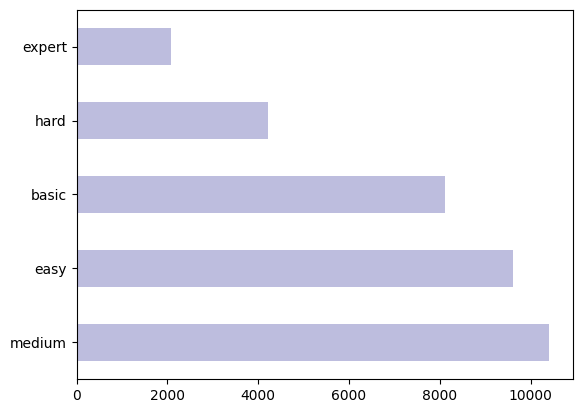

In [95]:
df['category'].value_counts().plot(kind='barh', color = '#bdbdde')

<Axes: title={'center': 'Category Distribution'}, ylabel='category'>

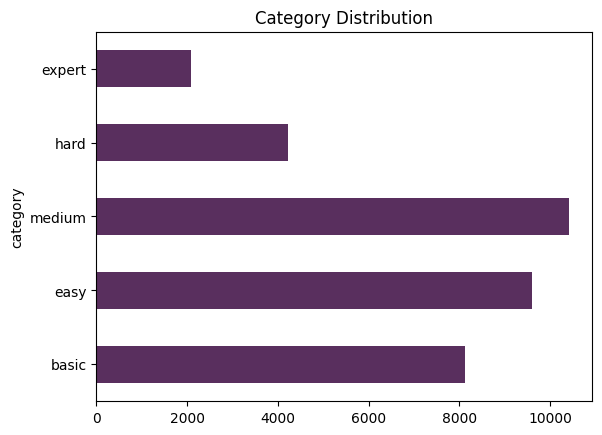

In [98]:
#We can change the order as per our requirements

df.groupby(by = 'category')['title'].count().loc[['basic', 'easy', 'medium', 'hard', 'expert']].plot(kind = 'barh', title = 'Category Distribution', color = '#592f5e')

**4.3 : Relation between number of articles published and date**

In [33]:
df.groupby(by = 'date')['title'].count()

date
01     986
02     959
03    1003
04     951
05     967
06    1121
07    1184
08    1011
09    1070
10    1182
11    1164
12     999
13    1019
14    1046
15     949
16     988
17    1174
18    1070
19    1107
20     979
21    1293
22    1315
23    1020
24    1175
25     975
26    1175
27    1105
28    2430
29    1134
30    1149
31     738
Name: title, dtype: int64

<Axes: title={'center': 'Date wise articles published'}, xlabel='date'>

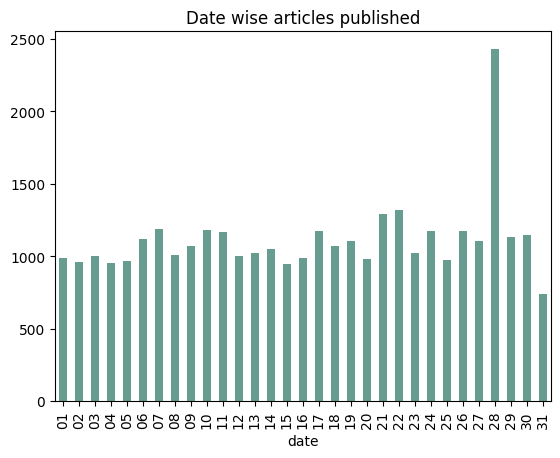

In [97]:
df.groupby(by = 'date')['title'].count().plot(kind = 'bar', title = 'Date wise articles published', color = '#679c90')

**4.4 : Relation between number of articles published and month**

In [37]:
df.groupby(by = 'month')['title'].count()

month
Apr    2318
Aug    3191
Dec    2673
Feb    2715
Jan    3204
Jul    2823
Jun    4057
Mar    1510
May    3328
Nov    2931
Oct    2771
Sep    2917
Name: title, dtype: int64

<Axes: title={'center': 'Month Wise Articles Published'}, xlabel='month'>

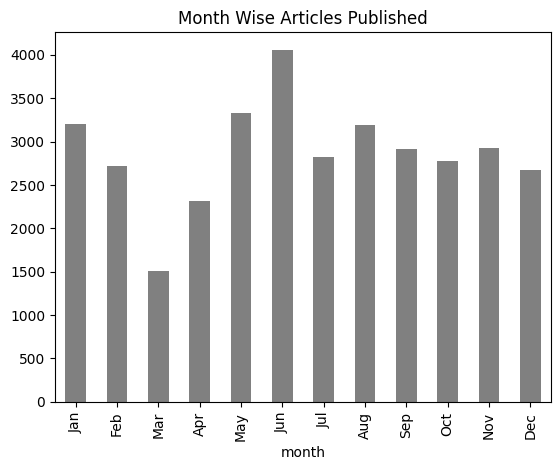

In [116]:
df.groupby(by = 'month')['title'].count().loc[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].plot(kind = 'bar', title = 'Month Wise Articles Published', color = 'grey')



**4.5 : Relation between number of articles published and year**

In [40]:
df.groupby(by = 'year')['title'].count()

year
2010        1
2011        1
2012        5
2013       70
2014       53
2015      172
2016      200
2017     1020
2018     2522
2019     3984
2020     4623
2021    18603
2022     3184
Name: title, dtype: int64

<Axes: title={'center': 'Year wise Articles Published'}, xlabel='year'>

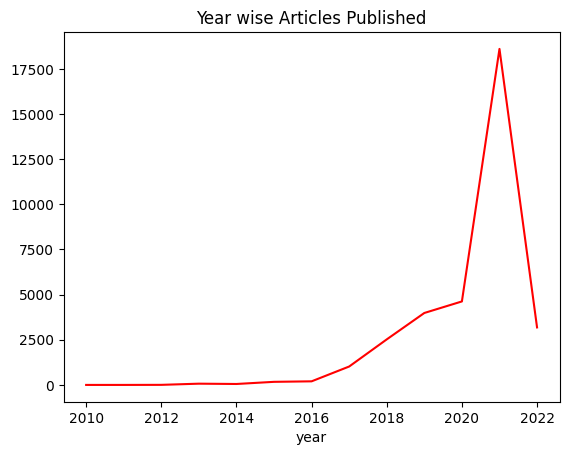

In [44]:
df.groupby(by = 'year')['title'].count().plot(kind = 'line', title = 'Year wise Articles Published', color = 'red')

**4.6 : In the history of GFG, which day has most number of articles published?**

In [50]:
df.groupby(by = 'last_updated')['title'].count().sort_values(ascending = False).head(1)

last_updated
28 Jun, 2021    1283
Name: title, dtype: int64

**4.7 : Top 5 writers for awarding them for their maximum contribution to GFG portal**

In [65]:
df.groupby(by = 'author_id')['title'].count().sort_values(ascending = False)[1:6]

author_id
ManasChhabra2    316
Striver          261
manjeet_04       246
Chinmoy Lenka    191
pawan_asipu      155
Name: title, dtype: int64

<Axes: title={'center': 'Top 5 Authors'}, ylabel='title'>

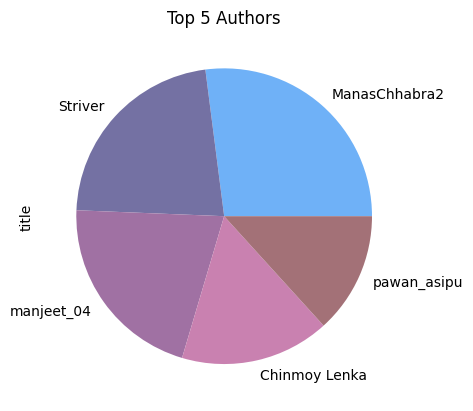

In [135]:
df.groupby(by = 'author_id')['title'].count().sort_values(ascending = False)[1:6].plot(
    kind = 'pie',
    title = 'Top 5 Authors',
    colors = ['#6fb1f7', '#7471a3', '#a071a3', '#c981b0', '#a37177'])